<a href="https://colab.research.google.com/github/atalaydenknalbant/Medical_Insurance_Cost_Prediction/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Cost Prediction



#Dataset https://drive.google.com/open?id=1rJNN5oWWXtWnY_MAdYnOE-tI_lpyXQc5

#Importing required libs

In [ ]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


#Mount drive




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read data


In [ ]:
raw_ds = pd.read_csv('/content/drive/My Drive/insurance.csv')
dataset = raw_ds.copy()

#Look for NaN values

In [ ]:
dataset.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Convert categoricals

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataset.smoker.drop_duplicates()) 
dataset.smoker = le.transform(dataset.smoker)
le.fit(dataset.region.drop_duplicates()) 
dataset.region = le.transform(dataset.region)
le.fit(dataset.sex.drop_duplicates()) 
dataset.sex = le.transform(dataset.sex)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#Visualization of some data

Since we know smoking causes health problems we look for smokers.

Text(0.5, 1.0, 'Non-Smoker distribution by charge')

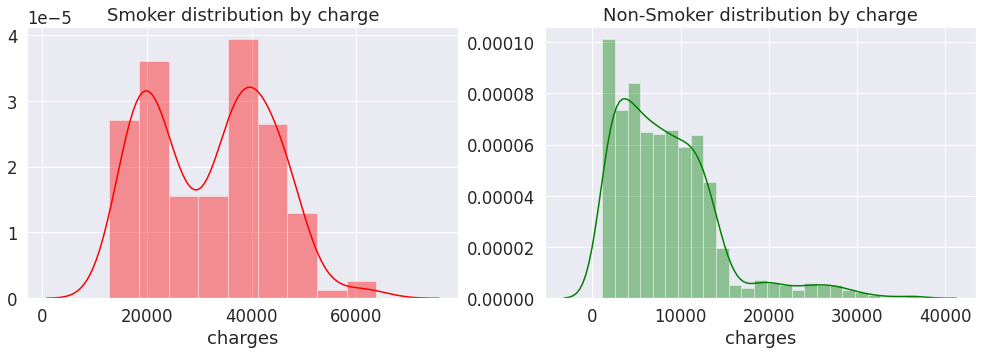

In [ ]:
figure1= plt.figure(figsize=(17,5))

ax=figure1.add_subplot(121)
sns.distplot(dataset[(dataset.smoker == 1)]["charges"], ax=ax, color="red")
ax.set_title('Smoker distribution by charge')

ax=figure1.add_subplot(122)
sns.distplot(dataset[(dataset.smoker == 0)]['charges'], ax=ax, color="green")
ax.set_title('Non-Smoker distribution by charge')


Gender distribution

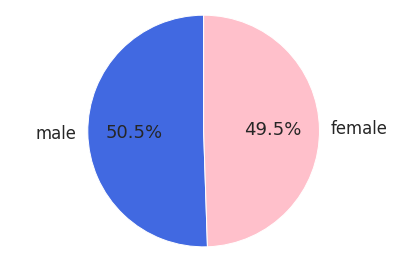

In [ ]:
labels = ["male", "female"]
size = [(len(dataset[dataset.sex == 1])),(len(dataset[dataset.sex == 0])) ]
plt.pie(size, labels=labels,
        autopct='%1.1f%%',
        startangle=90, colors= ["royalblue","pink"])
plt.axis('equal')
plt.tight_layout()


Heat map





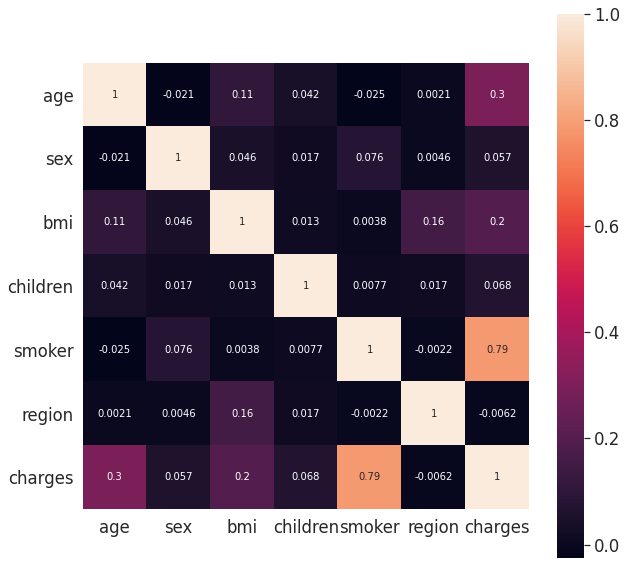

In [ ]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})

#Linear Regression

We need to predict charges 


In [ ]:
x = dataset.drop(['charges'], axis = 1)
y = dataset['charges']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df1 = df.head(25)
print(df1)


           Actual     Predicted
578    9724.53000  11017.230479
610    8547.69130   9787.530168
569   45702.02235  37994.782118
1034  12950.07120  16122.778407
198    9644.25250   6930.759230
981    4500.33925   3969.020462
31     2198.18985   1551.784302
1256  11436.73815  14283.209099
1219   7537.16390   8953.428858
1320   5425.02335   7431.945577
613    6753.03800   4544.576684
1107  10493.94580  10247.275350
1263   7337.74800   8657.107572
406    4185.09790   4126.197696
795   18310.74200  27811.317052
970   10702.64240  11039.597149
824   12523.60480  11251.445760
141    3490.54910   6031.010026
1173   6457.84340   8173.392525
1042  33475.81715  27039.442376
966   23967.38305  33577.848406
467   12643.37780  14267.086353
1098  23045.56616  11685.023218
757   23065.42070  32406.940326
1097   1674.63230   4414.651525


Finding metrics


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3930.333273901142
Mean Squared Error: 31845929.13415944
Root Mean Squared Error: 5643.219748880902


#Polynomial Regression


In [ ]:
x = dataset.drop(['charges','region'], axis = 1)
y = dataset.charges



q = PolynomialFeatures(degree = 2)
x_q = q.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_q,y, random_state = 0)

plr = LinearRegression().fit(x_train,y_train)

y_train_pred = plr.predict(x_train)
y_test_pred = plr.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df1 = df.head(25)
print(df1)

           Actual     Predicted
578    9724.53000  12082.167100
610    8547.69130  10546.855461
569   45702.02235  48255.652790
1034  12950.07120  14254.359125
198    9644.25250   8640.260098
981    4500.33925   5044.821422
31     2198.18985   3181.933372
1256  11436.73815  13552.158356
1219   7537.16390   9674.283149
1320   5425.02335   7149.232668
613    6753.03800   6989.909341
1107  10493.94580  12103.005220
1263   7337.74800   9424.162001
406    4185.09790   5401.194038
795   18310.74200  25414.717226
970   10702.64240  13018.447044
824   12523.60480  13282.863969
141    3490.54910   5190.407688
1173   6457.84340   8448.556535
1042  33475.81715  27326.479238
966   23967.38305  26720.297037
467   12643.37780  14633.928590
1098  23045.56616  10948.383903
757   23065.42070  29970.246254
1097   1674.63230   3587.468432


Finding metrics


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2761.13481435985
Mean Squared Error: 18117605.544237282
Root Mean Squared Error: 4256.478068102464


#Random Forest Regression


In [ ]:
f = RandomForestRegressor(n_estimators = 50,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs =-1)
f.fit(x_train,y_train)
f_train_pred = f.predict(x_train)
f_test_pred = f.predict(x_test)

Finding metrics


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, f_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, f_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, f_test_pred)))

Mean Absolute Error: 2622.80317283985
Mean Squared Error: 19975836.727607574
Root Mean Squared Error: 4469.433602550504


Visualizing data

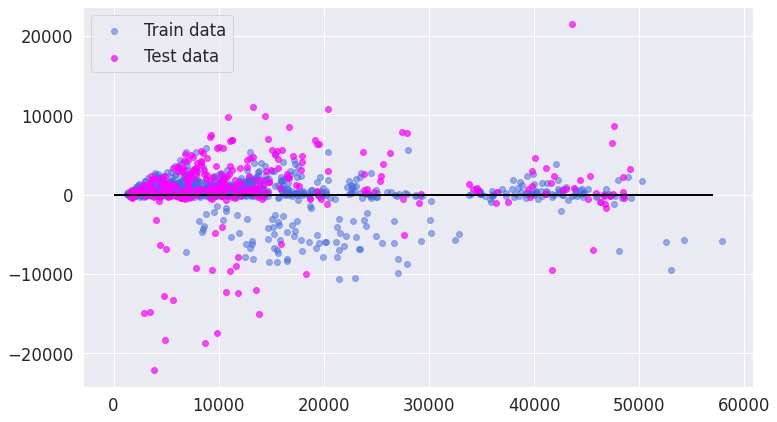

In [ ]:
plt.figure(figsize=(12,7))

plt.scatter(f_train_pred,f_train_pred - y_train,
          c = 'royalblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(f_test_pred,f_test_pred - y_test,
          c = 'magenta', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 57000, lw = 2, color = 'black')
plt.legend(loc = 'upper left')